In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# Read Data
path = "ecommerce.csv"

df = pd.read_csv(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2.0,10/23/2011 14:40,12.75,18005.0,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1.0,9/29/2011 15:57,4.95,17813.0,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4.0,10/30/2011 11:34,4.15,12483.0,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12.0,5/5/2011 15:08,1.25,12576.0,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24.0,10/20/2011 13:37,3.39,15587.0,United Kingdom


In [6]:
df.shape

(39411, 8)

# SOAL 1

Sebutkan variabel apa saja yang ada pada data “ecommerce.csv”, kemudian identifikasi setiap variabel apakah termasuk variabel kualitatif (ordinal/nominal) atau kuantitatif (diskrit/kontinu).

JAWAB
Variabel = 8

1.   InvoiceNo (Kualitatif/Nominal)
2.   StockCode (Kualitatif/Nominal)
3.   Description (Kualitatif/Nominal)
4.   Quantity (Kuantitatif/Diskrit)
5.   InvoiceDate (Kualitatif/Nominal)
6.   UnitPrice (Kuantitatif/Kontinu)
7.   CostumerID (Kualitatif/Nominal)
8.   Country (Kualitatif/Nominal)

Penjelasan:
Mengapa variabel seperti InvoiceNo, StockCode, CustomerID mesikipun berbentuk angka tapi dianggap sebagai variabel kualitatif? Hal ini dikarenakan kita tidak mungkin melakukan operasi perhitungan pada nilai-nilai pada variabel tersebut. It doens't make anys sense ketika kita mencari nilai rata-rata CostumerID. Nilai-nilai tersebut hanya *identifier*.

# Soal 2a
Apa nama barang tersebut?

## Jawab
REGENCY CAKESTAND 3 TIER

In [15]:
df.query("StockCode == '22423'")['Description'].head(1)

0    REGENCY CAKESTAND 3 TIER
Name: Description, dtype: object

# Soal 2b
Berdasarkan kuantitas pembelian, berapa mean, median, dan modusnya?

## Jawab
$Mean = 6.716049382716049$

$Median = 2$

$Mode =  1$ 

hanya ada 1 modus

In [21]:
mean_c = df.query("StockCode == '22423'")['Quantity'].mean()
median_c = df.query("StockCode == '22423'")['Quantity'].median()
mode_c = df.query("StockCode == '22423'")['Quantity'].mode()

print(f'Mean : {mean_c}')
print(f'Median : {median_c}')
print(f'Modus : {mode_c}')

Mean : 6.716049382716049
Median : 2.0
Modus : 0    1.0
Name: Quantity, dtype: float64


# Soal 2c
Berdasarkan kuantitas pembelian, berapa nilai Q1, Q2, Q3, dan IQR-nya?

## Jawab
$Q1 = 1$

$Q2 = 2$

$Q3 = 4$

$IQR = Q3 - Q1 = 4 - 1 = 3$

In [23]:
df.query("StockCode == '22423'")['Quantity'].describe()

count    162.000000
mean       6.716049
std       22.383853
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      272.000000
Name: Quantity, dtype: float64

# Soal 2d
Apakah terdapat outlier pada data kuantitas? Jika ya, sebutkan berapa jumlahnya!

# Jawab
Ada. Jumlahnya 26

Pembahasan:
Mahasiswa perlu mencari nilai minimal ($Q1-(1.5*IQR)$) dan maksimal ($Q3+(1.5*IQR)$) untuk menentukan *outlier*. Dikarenakan nilai dibawah $Q1=1$ tidak ada, maka hanya perlu dicari nilai maksimalnya.

$$ Maks = Q3 + (1.5 * IQR) $$
$$ Maks = 4 + (1.5 * 3) = 8.5 $$

Sehingga, mahasiswa harus menghitung jumlah kuantitas pembelian barang diatas 8.5

In [24]:
df.query("StockCode == '22423' and Quantity > 8.5")['Quantity'].count()

26

# Soal 2e
Buatlat histrogram (rentang bebas) berdasarkan kuantitas?

## Jawab
Mahasiswa dibebaskan untuk menentukan rentang / bins setiap kelompok kelas

<Axes: >

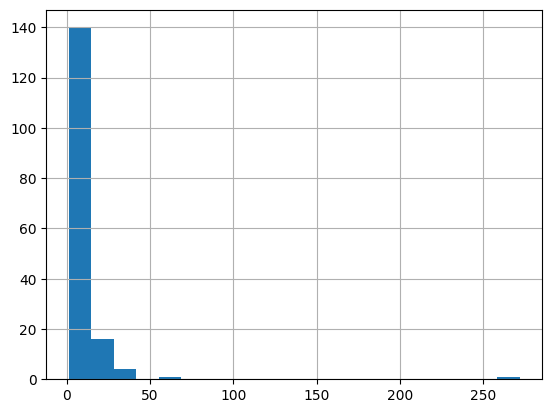

In [33]:
df.query("StockCode == '22423'")['Quantity'].hist(bins=20)

# Soal 3a
Jumlah penjualan untuk kode stok ‘22423’ untuk setiap negara.

## Jawab

<Axes: xlabel='Country'>

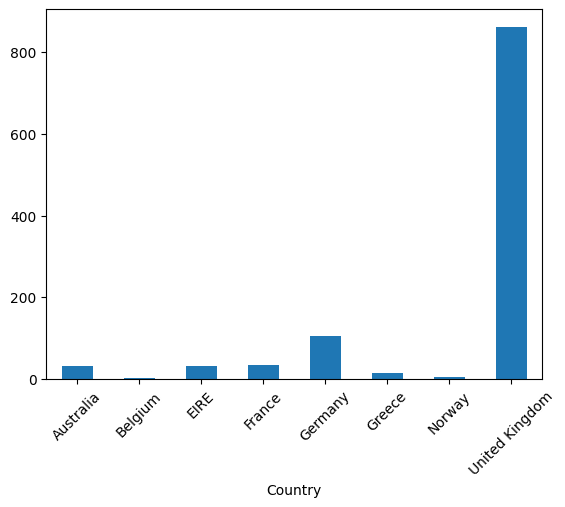

In [44]:
df.query("StockCode == '22423'").groupby('Country')['Quantity'].sum().plot.bar(rot=45)

# Soal 3b
Persentase penjualan untuk kode stok ‘22423’ untuk setiap negara.

## Jawab

<Axes: ylabel='Quantity'>

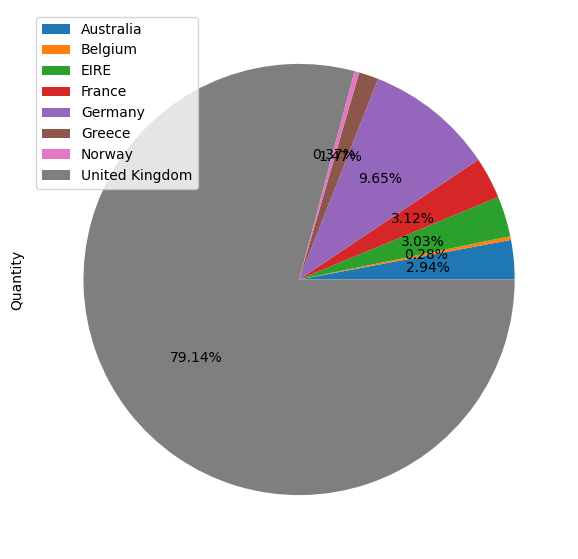

In [40]:
df.query("StockCode == '22423'").groupby('Country')['Quantity'].sum().plot.pie(autopct='%.2f%%', figsize=(7,7), legend=True, labeldistance=None)

# Soal 3c
Lima item dengan penjualan teratas berdasarkan kode stok.

## Jawab

<Axes: xlabel='StockCode'>

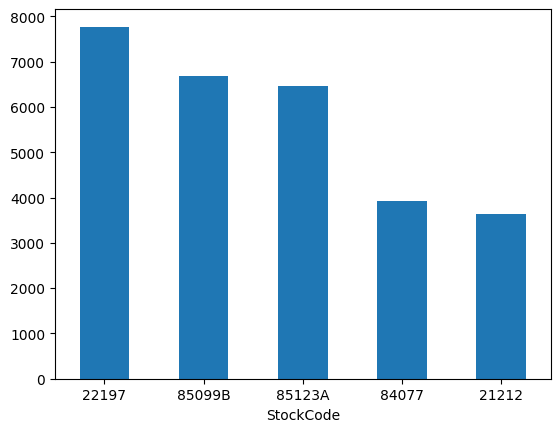

In [48]:
df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5).plot.bar(rot=0)